In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path='/content/drive/My Drive/pattern/Covid19-dataset/train'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator_train=ImageDataGenerator(rescale=1./255,validation_split=0.0,dtype=None)
train=generator_train.flow_from_directory(data_path,target_size=(64,64),batch_size=32, class_mode='categorical', color_mode='rgb')

Found 251 images belonging to 3 classes.


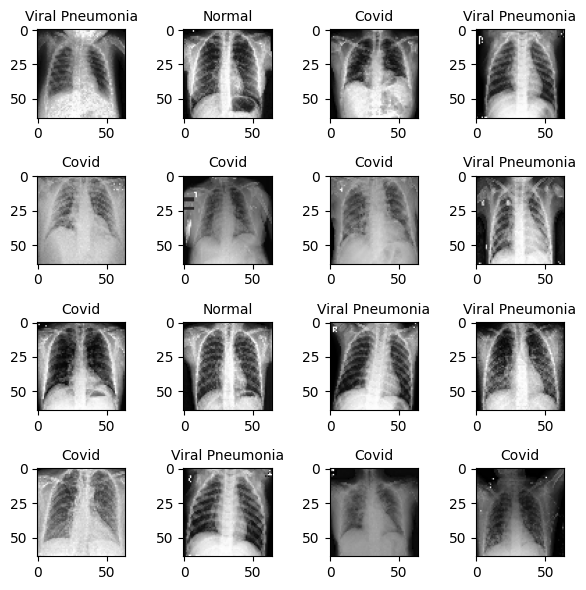

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class_dict=train.class_indices
classes=list(class_dict.keys())

images, labels=next(train)

plt.figure(figsize=(6,6))

for i in range(16):
  plt.subplot(4,4,i+1)
  image=images[i]
  plt.imshow(image)
  index=np.argmax(labels[i])
  class_name=classes[index]
  plt.title(class_name,color='k',fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
#Lab 2
import tensorflow as tf
from tensorflow import keras

img_height, img_weight=300,300
input_shape=(300,300)
batch_size=32
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset='training',
    seed=123,
    label_mode='categorical',
    image_size=(img_height,img_weight),
    batch_size=batch_size
)


Found 251 files belonging to 3 classes.
Using 201 files for training.


In [ ]:
class_names=train_ds.class_names
print(class_names)

['Covid', 'Normal', 'Viral Pneumonia']


In [ ]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    label_mode='categorical',
    image_size=(img_height,img_weight),
    batch_size=batch_size
)

Found 251 files belonging to 3 classes.
Using 50 files for validation.


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

model=Sequential()
model.add(Conv2D(32,(3,3), input_shape=(img_height,img_weight,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(3,activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])




In [ ]:
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
7/7 [==============================] - 28s 989ms/step - loss: 9304.2744 - accuracy: 0.3731 - val_loss: 3417.0076 - val_accuracy: 0.4800
Epoch 2/20
7/7 [==============================] - 4s 168ms/step - loss: 3862.3340 - accuracy: 0.5373 - val_loss: 1536.3243 - val_accuracy: 0.5600
Epoch 3/20
7/7 [==============================] - 7s 487ms/step - loss: 648.5978 - accuracy: 0.6816 - val_loss: 463.4514 - val_accuracy: 0.3600
Epoch 4/20
7/7 [==============================] - 5s 168ms/step - loss: 163.2609 - accuracy: 0.7363 - val_loss: 53.6889 - val_accuracy: 0.7600
Epoch 5/20
7/7 [==============================] - 5s 173ms/step - loss: 8.9767 - accuracy: 0.9254 - val_loss: 8.5528 - val_accuracy: 0.9400
Epoch 6/20
7/7 [==============================] - 6s 232ms/step - loss: 4.0231 - accuracy: 0.9552 - val_loss: 12.9750 - val_accuracy: 0.8600
Epoch 7/20
7/7 [==============================] - 4s 162ms/step - loss: 3.9655 - accuracy: 0.9353 - val_loss: 18.5612 - val_accuracy: 0.840

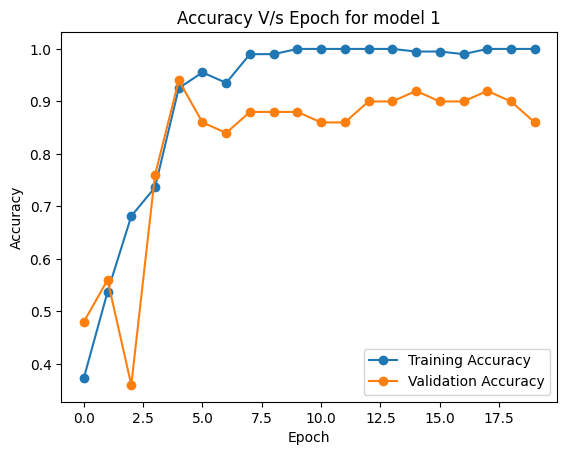

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy V/s Epoch for model 1')

plt.legend()
plt.show()


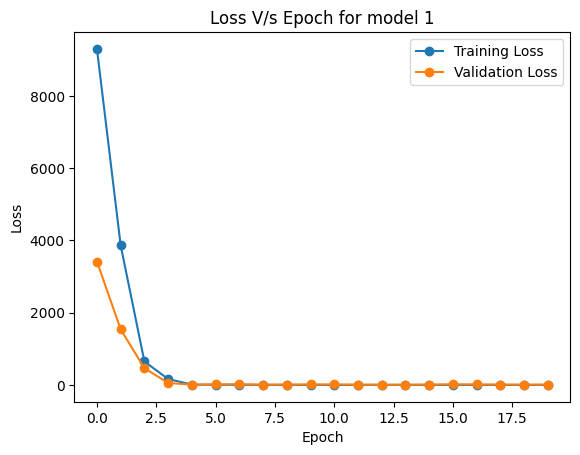

In [ ]:
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss V/s Epoch for model 1')

plt.legend()
plt.show()

2/2 [==============================] - 1s 14ms/step


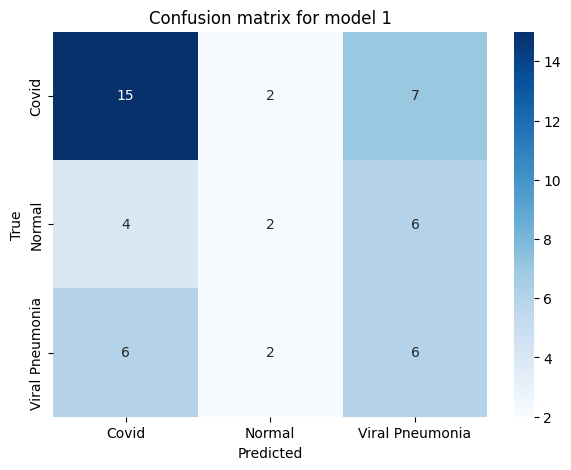

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

val_predictions= model.predict(val_ds)
val_labels= np.concatenate([labels for images, labels in val_ds], axis=0)

val_predictions_categorical=np.argmax(val_predictions, axis=1)
val_labels_categorical=np.argmax(val_labels,axis=1)

confusion_matrix=confusion_matrix(val_labels_categorical, val_predictions_categorical)
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion matrix for model 1")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

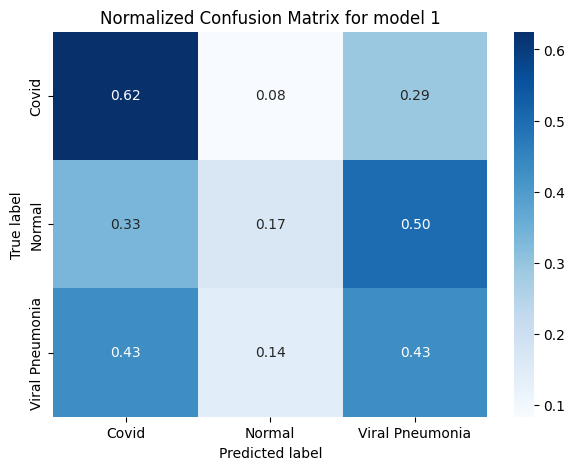

In [ ]:
cm_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(7, 5))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Normalized Confusion Matrix for model 1")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

val_data, val_labels = next(iter(val_ds))
true_labels = np.argmax(val_labels, axis=1)

predictions = model.predict(val_data)
predicted_labels = np.argmax(predictions, axis=1)

precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("For model 1")
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))



1/1 [==============================] - 0s 87ms/step
For model 1
Precision: 0.8732
Recall: 0.8438
F1-score: 0.8348


In [ ]:
from sklearn.metrics import classification_report

val_loss, val_accuracy = model.evaluate(val_ds)

# Generate predictions
predictions = model.predict(val_ds)
y_pred = np.argmax(predictions, axis=1)

# Extract ground truth labels
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

report = classification_report(y_true, y_pred, target_names=class_names)

print("Classification Report for Model 1")
print(report)


2/2 [==============================] - 1s 14ms/step
Classification Report for Model 1
                 precision    recall  f1-score   support

          Covid       0.52      0.54      0.53        24
         Normal       0.17      0.08      0.11        12
Viral Pneumonia       0.37      0.50      0.42        14

       accuracy                           0.42        50
      macro avg       0.35      0.38      0.36        50
   weighted avg       0.39      0.42      0.40        50



**Model 2**

In [ ]:
from tensorflow.keras.layers import Dropout

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(img_height, img_weight, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(3, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history2=model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
7/7 [==============================] - 11s 401ms/step - loss: 3282.0747 - accuracy: 0.3632 - val_loss: 130.3870 - val_accuracy: 0.6800
Epoch 2/20
7/7 [==============================] - 5s 290ms/step - loss: 202.7309 - accuracy: 0.6368 - val_loss: 28.2852 - val_accuracy: 0.8000
Epoch 3/20
7/7 [==============================] - 5s 198ms/step - loss: 18.9367 - accuracy: 0.8607 - val_loss: 5.9796 - val_accuracy: 0.9000
Epoch 4/20
7/7 [==============================] - 4s 199ms/step - loss: 4.2448 - accuracy: 0.9204 - val_loss: 6.6674 - val_accuracy: 0.8000
Epoch 5/20
7/7 [==============================] - 5s 292ms/step - loss: 1.4706 - accuracy: 0.9303 - val_loss: 3.5498 - val_accuracy: 0.8200
Epoch 6/20
7/7 [==============================] - 5s 195ms/step - loss: 1.1524 - accuracy: 0.9353 - val_loss: 5.2049 - val_accuracy: 0.8400
Epoch 7/20
7/7 [==============================] - 4s 198ms/step - loss: 0.3922 - accuracy: 0.9851 - val_loss: 2.3308 - val_accuracy: 0.8000
Epoch 8/20

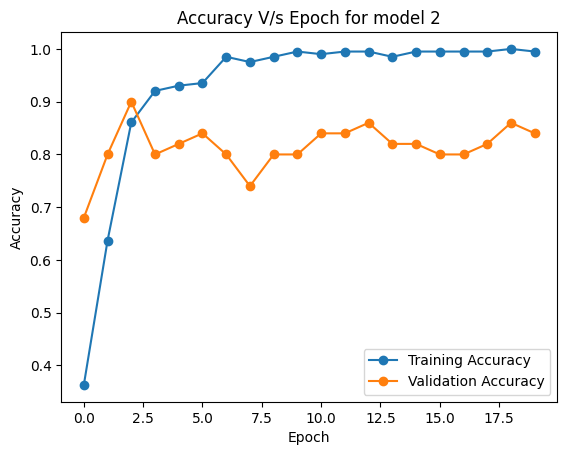

In [ ]:

plt.plot(history2.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy V/s Epoch for model 2')

plt.legend()
plt.show()

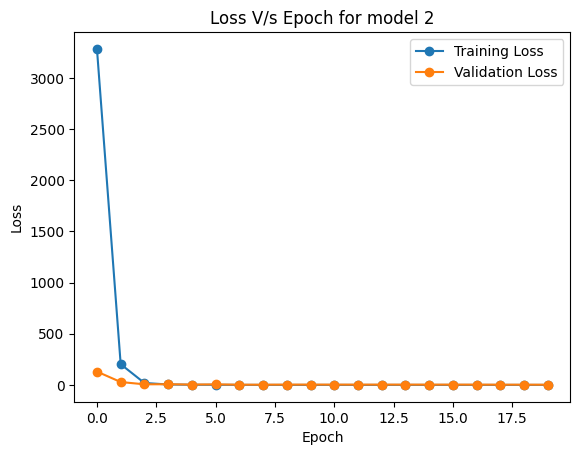

In [ ]:
plt.plot(history2.history['loss'], label='Training Loss', marker='o')
plt.plot(history2.history['val_loss'], label='Validation Loss', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss V/s Epoch for model 2')

plt.legend()
plt.show()

2/2 [==============================] - 1s 26ms/step


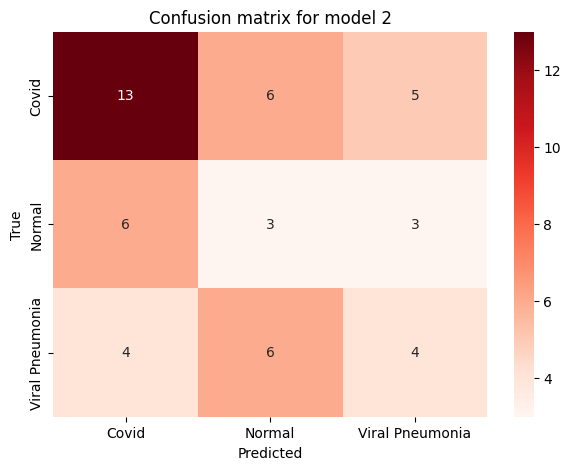

In [ ]:
val_predictions2= model2.predict(val_ds)
val_labels2= np.concatenate([labels for images, labels in val_ds], axis=0)

val_predictions_categorical2=np.argmax(val_predictions2, axis=1)
val_labels_categorical2=np.argmax(val_labels2,axis=1)

confusion_matrix2=confusion_matrix(val_labels_categorical2, val_predictions_categorical2)
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix2, annot=True, fmt="d", cmap="Reds",xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion matrix for model 2")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

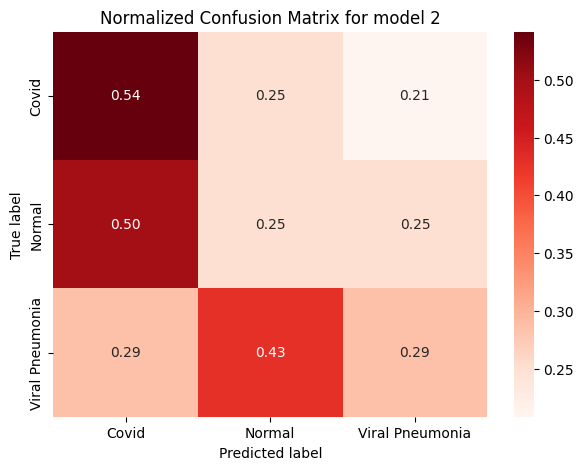

In [ ]:
cm_normalized2 = confusion_matrix2.astype('float') / confusion_matrix2.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(7, 5))
sns.heatmap(cm_normalized2, annot=True, fmt=".2f", cmap="Reds", xticklabels=class_names, yticklabels=class_names)
plt.title("Normalized Confusion Matrix for model 2")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [ ]:
val_data, val_labels = next(iter(val_ds))
true_labels = np.argmax(val_labels, axis=1)

predictions2 = model2.predict(val_data)
predicted_labels2 = np.argmax(predictions2, axis=1)

precision2 = precision_score(true_labels, predicted_labels2, average='weighted')
recall2 = recall_score(true_labels, predicted_labels2, average='weighted')
f12 = f1_score(true_labels, predicted_labels2, average='weighted')

print("For model 2")
print("Precision: {:.4f}".format(precision2))
print("Recall: {:.4f}".format(recall2))
print("F1-score: {:.4f}".format(f12))

1/1 [==============================] - 0s 85ms/step
For model 2
Precision: 0.8345
Recall: 0.8125
F1-score: 0.8161


In [ ]:
val_loss2, val_accuracy2 = model2.evaluate(val_ds)

# Generate predictions
predictions2 = model2.predict(val_ds)
y_pred2= np.argmax(predictions2, axis=1)

# Extract ground truth labels
y_true2 = np.concatenate([y for x, y in val_ds], axis=0)
y_true2 = np.argmax(y_true2, axis=1)

report2 = classification_report(y_true2, y_pred2, target_names=class_names)

print("Classification Report for Model 2")
print(report2)


2/2 [==============================] - 1s 25ms/step
Classification Report for Model 2
                 precision    recall  f1-score   support

          Covid       0.48      0.46      0.47        24
         Normal       0.20      0.25      0.22        12
Viral Pneumonia       0.25      0.21      0.23        14

       accuracy                           0.34        50
      macro avg       0.31      0.31      0.31        50
   weighted avg       0.35      0.34      0.34        50



Model 3

In [ ]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=(img_height, img_weight, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32,(3,3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(64,(3,3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Flatten())
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(3,activation='sigmoid'))

model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history3=model3.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
7/7 [==============================] - 10s 400ms/step - loss: 177.6664 - accuracy: 0.3234 - val_loss: 2.2806 - val_accuracy: 0.6800
Epoch 2/20
7/7 [==============================] - 4s 185ms/step - loss: 3.5341 - accuracy: 0.4577 - val_loss: 1.1282 - val_accuracy: 0.7000
Epoch 3/20
7/7 [==============================] - 6s 253ms/step - loss: 0.9562 - accuracy: 0.6617 - val_loss: 0.7458 - val_accuracy: 0.5400
Epoch 4/20
7/7 [==============================] - 4s 179ms/step - loss: 0.6166 - accuracy: 0.7562 - val_loss: 0.4820 - val_accuracy: 0.8200
Epoch 5/20
7/7 [==============================] - 4s 187ms/step - loss: 0.6469 - accuracy: 0.7761 - val_loss: 1.0733 - val_accuracy: 0.7200
Epoch 6/20
7/7 [==============================] - 6s 220ms/step - loss: 0.7319 - accuracy: 0.7512 - val_loss: 0.5139 - val_accuracy: 0.8000
Epoch 7/20
7/7 [==============================] - 4s 183ms/step - loss: 0.2798 - accuracy: 0.9005 - val_loss: 0.3490 - val_accuracy: 0.9000
Epoch 8/20
7/7 [=

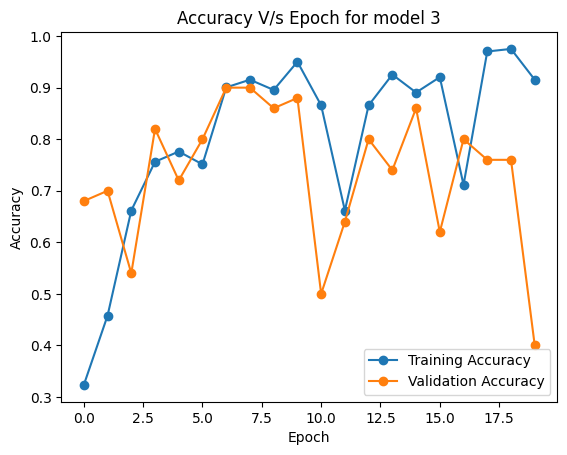

In [ ]:
plt.plot(history3.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy V/s Epoch for model 3')

plt.legend()
plt.show()

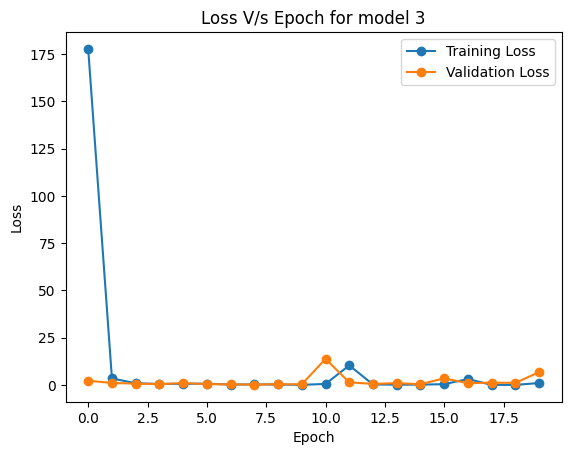

In [ ]:
plt.plot(history3.history['loss'], label='Training Loss', marker='o')
plt.plot(history3.history['val_loss'], label='Validation Loss', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss V/s Epoch for model 3')

plt.legend()
plt.show()

2/2 [==============================] - 1s 13ms/step


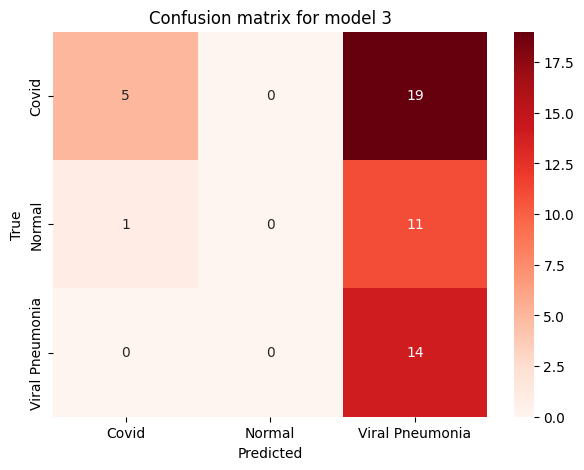

In [ ]:
val_predictions3= model3.predict(val_ds)
val_labels3= np.concatenate([labels for images, labels in val_ds], axis=0)

val_predictions_categorical3=np.argmax(val_predictions3, axis=1)
val_labels_categorical3=np.argmax(val_labels3,axis=1)

confusion_matrix3=confusion_matrix(val_labels_categorical3, val_predictions_categorical3)
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix3, annot=True, fmt="d", cmap="Reds",xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion matrix for model 3")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

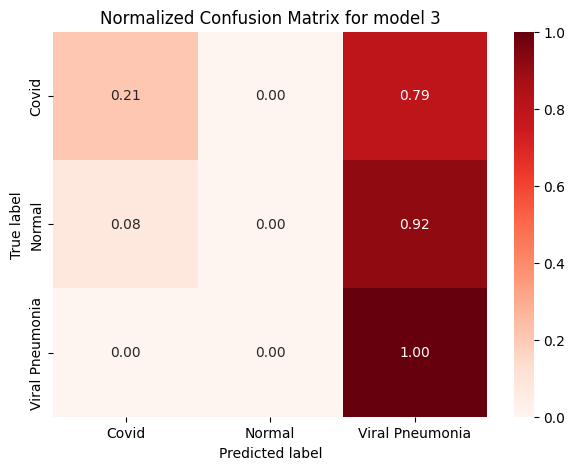

In [ ]:
cm_normalized3 = confusion_matrix3.astype('float') / confusion_matrix3.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(7, 5))
sns.heatmap(cm_normalized3, annot=True, fmt=".2f", cmap="Reds", xticklabels=class_names, yticklabels=class_names)
plt.title("Normalized Confusion Matrix for model 3")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [ ]:
val_data, val_labels = next(iter(val_ds))
true_labels = np.argmax(val_labels, axis=1)

predictions3 = model3.predict(val_data)
predicted_labels3 = np.argmax(predictions3, axis=1)

precision3 = precision_score(true_labels, predicted_labels3, average='weighted')
recall3 = recall_score(true_labels, predicted_labels3, average='weighted')
f13 = f1_score(true_labels, predicted_labels3, average='weighted')

print("For model 3")
print("Precision: {:.4f}".format(precision3))
print("Recall: {:.4f}".format(recall3))
print("F1-score: {:.4f}".format(f13))

1/1 [==============================] - 0s 98ms/step
For model 3
Precision: 0.6505
Recall: 0.3750
F1-score: 0.3375


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
val_loss3, val_accuracy3 = model3.evaluate(val_ds)

# Generate predictions
predictions3 = model3.predict(val_ds)
y_pred3= np.argmax(predictions3, axis=1)

# Extract ground truth labels
y_true3 = np.concatenate([y for x, y in val_ds], axis=0)
y_true3 = np.argmax(y_true3, axis=1)

report3 = classification_report(y_true3, y_pred3, target_names=class_names)

print("Classification Report for Model 3")
print(report3)


2/2 [==============================] - 1s 23ms/step
Classification Report for Model 3
                 precision    recall  f1-score   support

          Covid       0.67      0.17      0.27        24
         Normal       0.00      0.00      0.00        12
Viral Pneumonia       0.30      0.93      0.45        14

       accuracy                           0.34        50
      macro avg       0.32      0.37      0.24        50
   weighted avg       0.40      0.34      0.25        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
